# Logistic Regression

## Introduction

In example, we will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision. Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams.

## Visualizing the data

Before starting to implement any learning algorithm, it is always good to
visualize the data if possible.

The file 'data/ex2data1.txt' contains the dataset for our Logistic regression problem.

Here we will load the data and display it on a 2-dimensional plot, where the axes are the two exam scores, and the positive and
negative examples are shown with different markers.

In [1]:
# initial imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns

# setting graph properties
plt.rcParams['figure.dpi'] = 300  # setting figure dpi for better quality graphs
plt.rcParams['figure.figsize'] = [10,8]
sns.set(context="notebook", style="white")  # graph styling using seaborn
%config InlineBackend.figure_format = 'svg'

In [2]:
# imports from my models designed for these examples
from models.data_preprocessing import add_bias_unit, map_feature, feature_normalize
from models.logistic_regression import cost_function, predict, gradient_descent, gradient_function, sigmoid
from models.plotter import plot_decision_boundary

In [3]:
print('Loading data ...')
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X = data[:, :-1]  # (100, 2)
y = data[:, -1, np.newaxis]  # (100, 1)

Loading data ...


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


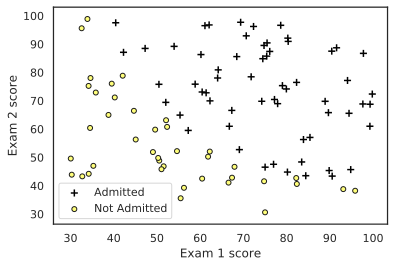

In [4]:
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')
"""
Example plotting for multiple markers
x = np.array([1,2,3,4,5,6])
y = np.array([1,3,4,5,6,7])
m = np.array(['o','+','+','o','x','+'])

unique_markers = set(m)  # or yo can use: np.unique(m)

for um in unique_markers:
    mask = m == um 
    # mask is now an array of booleans that van be used for indexing  
    plt.scatter(x[mask], y[mask], marker=um)
"""
fig, ax = plt.subplots()
y_slim = y.ravel()
# plotting y=1 values
ax.scatter(x=X[y_slim == 1, 0], y=X[y_slim == 1, 1], marker='+', c='black', s=50, label='Admitted')
# plotting y=0 values
# X[y_slim == 0, 0] is logical indexing with rows with y=0 only
ax.scatter(x=X[y_slim == 0, 0], y=X[y_slim == 0, 1], marker='o', c='xkcd:light yellow', s=25, label='Not Admitted', edgecolor='k')

# labels
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

# Specified in plot order
ax.legend()

## Implementation

### Sigmoid function

The logistic regression hypothesis is defined as:

$$
h_{\theta}\left( x \right) = g\left( \theta^{T}x \right)
$$

where function g is the sigmoid function. The sigmoid function is defined as:

$$
g\left( z \right) = \frac{1}{1+\epsilon^{-z}}
$$

We have implemented the above function in "sigmoid()" function so it can be called by the rest of your program. Lets try testing a few
values by calling sigmoid(x) below.

For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Our code should also work with vectors and matrices. For a matrix, our function should perform the sigmoid function on every element.

In [5]:
print("Sigmoid(99) = {:.6f}".format(sigmoid(99)))
print("Sigmoid(0) = {:.6f}".format(sigmoid(0)))
print("Sigmoid(-99) = {:.6f}".format(sigmoid(-99)))


Sigmoid(99) = 1.000000
Sigmoid(0) = 0.500000
Sigmoid(-99) = 0.000000


### Cost Function and Gradient

The cost function for logistic regression is:

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left[ -y^{(i)} \log\left( h_{\theta} \left( x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_{\theta} \left( x^{(i)} \right) \right) \right]
$$

and the gradient of cost is a vector of the sma elength as $\theta$ where $j^{th}$ element (for j = 0,1,...,n) is defined as follows:

$$
\frac{\delta J(\theta)}{\delta \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta} \left( x^{(i)} \right) - y^{(i)} \right)x_{j}^{(i)}
$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of hθ(x).

In [6]:
# initial sizes
m, n = X.shape

# adding bias unit
X = add_bias_unit(X)

# Initialize fitting parameters
initial_theta = np.zeros([n + 1, 1])

# Compute and display initial cost and gradient
cost = cost_function(initial_theta, X, y, regularized=False)
grad = gradient_function(initial_theta, X, y, regularized=False)
print('Cost at initial theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ')
print(grad)
print('Expected gradients (approx):[ -0.1000 -12.0092 -11.2628]')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):[ -0.1000 -12.0092 -11.2628]


## Learning  parameters using scipy.minimize

In earlier examples, we found the optimal parameters of a linear regression model by implementing gradent descent. I also wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.

This time, instead of taking gradient descent steps, we will use an function called minimize from scipy.optimize module.

The scipy's minimize() function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in scipy.optimize.

For logistic regression, we need to optimize the cost function J(θ) with parameters θ. Concretely, we are going to use minimize to find the best parameters θ for the logistic regression cost function, given a fixed dataset (of X and y values).
You will pass to minimize() the following inputs:
- Our predefined cost_function which returns cost while taking X and theta as arguments.
- A gradient_function which returns the derivatives of the $\theta$ values passed to it.
- The initial values of the parameters we are trying to optimize.
- A function that, when given the training set and a particular θ, computes the logistic regression cost and gradient with respect to θ for the dataset (X, y)
- A callbak function which is called after each iteration and the $\theta$ value obtained after each iteration is passed to it, we are using this callback function to store theta values for each iteration.

The minimize() function returns a OptimizeResult object which contains final theta values, function end status, final cost etc.
more info about the minimize function can be refered to the documentation <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">here</a>.

Cost at theta found by Gradient descent: 0.2034977015895344
Expected cost (approx): 0.203
theta: [-25.16135699   0.2062319    0.2014718 ]
Expected theta (approx): [-25.161 0.206 0.201]


/home/mayank/PycharmProjects/machine_learning_implementations_with_numpy/models/logistic_regression.py:70: RuntimeWarning: divide by zero encountered in log
  J = (-(y.T @ np.log(h)) - ((1-y.T) @ np.log(1-h)))/m
/home/mayank/PycharmProjects/machine_learning_implementations_with_numpy/models/logistic_regression.py:70: RuntimeWarning: invalid value encountered in matmul
  J = (-(y.T @ np.log(h)) - ((1-y.T) @ np.log(1-h)))/m


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e28ce9588>)

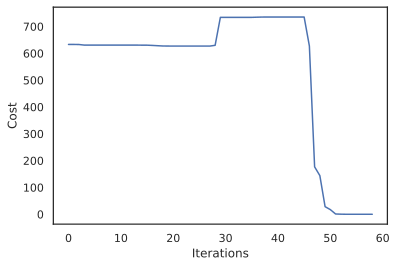

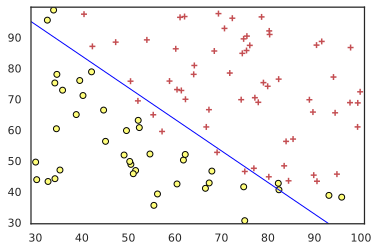

In [7]:
# =========== Performing gradient descent================
X_norm, mu, sigma = feature_normalize(X[:, 1:])
X_norm = add_bias_unit(X_norm)

from scipy.optimize import minimize

theta_history = []  # list to store the thetas after each iteration

# defining callback function
def log_theta(intermediate_theta, *args):
    theta_history.append(intermediate_theta)  # append method does inplace insertion

initial_theta = np.zeros(n+1)
op_result = minimize(fun=cost_function, x0=initial_theta, jac=gradient_function, args=(X, y, 0.01, False), method='cg', callback=log_theta)

print('Cost at theta found by Gradient descent: {}'.format(op_result.fun))
print('Expected cost (approx): 0.203')
print('theta: {}'.format(op_result.x))
print('Expected theta (approx): [-25.161 0.206 0.201]')

# converting theta_history(list) into J_history(cost history array)
J_history = (np.array(theta_history[::-1]) @ op_result.x)

# plot J_history vs iteration
fig1, ax1 = plt.subplots()
ax1.plot(range(J_history.size), J_history)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')

theta = op_result.x[:,np.newaxis]  # (n, 1)

# plotting decision boundry to visualize the result
plot_decision_boundary(theta, X, y, sigmoid, 0.1)

## Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score  of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found
is to see how well the learned model predicts on our training set. In this method a predict function is defined which will produce “1” or “0” predictions given a dataset and a learned parameter
vector θ.

In [11]:
prob = sigmoid(np.array([1, 45, 85]) @ theta)
print('For a student with scores 45 and 85, we predict an admission probability of {:.6f}'.format(prob[0]))
print('Expected value: 0.775 +/- 0.002')

# Compute accuracy on our training set
p = predict(X,theta)

print('Train Accuracy: {}'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.0\n')

For a student with scores 45 and 85, we predict an admission probability of 0.776291
Expected value: 0.775 +/- 0.002
Train Accuracy: 89.0
Expected accuracy (approx): 89.0

